train loss:2.3001097024107326
=== epoch:1, train acc:0.142, test acc:0.118 ===
train loss:2.29759485647904
train loss:2.293003607052743
train loss:2.2912539110784436
train loss:2.27931805037202
train loss:2.2661373268128226
train loss:2.250466562641051
train loss:2.247403187197968
train loss:2.2300486728002804
train loss:2.1907146193559925
train loss:2.1631421575076413
train loss:2.1368664789283724
train loss:2.096273879421106
train loss:2.0863373669921783
train loss:1.9354212112488818
train loss:1.9387812415974306
train loss:1.8674108694192395
train loss:1.8428122251228052
train loss:1.702313586556206
train loss:1.647327306336363
train loss:1.5018071427364357
train loss:1.4927845713469075
train loss:1.4153481002428814
train loss:1.3145003797044705
train loss:1.243754435855128
train loss:1.1896821055483238
train loss:1.0964868137373454
train loss:0.9933683960968187
train loss:1.059301310570833
train loss:0.9150122152264123
train loss:0.7478672339634389
train loss:0.8006004409967697
tra

train loss:0.2736571032767485
train loss:0.2549525160176456
train loss:0.0885893929185136
train loss:0.35006284548921246
train loss:0.1230621595157492
train loss:0.15290134123739385
train loss:0.2111554739980495
train loss:0.38949104636332094
train loss:0.28164825895082995
train loss:0.11806621408902963
train loss:0.23722130842524705
train loss:0.16767834497148473
train loss:0.26749071201018876
train loss:0.17585882284845014
train loss:0.28737416966819196
train loss:0.27692529603365906
train loss:0.19023861621291938
train loss:0.10197516912526743
train loss:0.17351425040138202
train loss:0.2535890822499404
train loss:0.1812883987670223
train loss:0.3043409055625979
train loss:0.19682164235099373
train loss:0.16483162678495425
train loss:0.1507089390468702
train loss:0.23100194982539532
train loss:0.29082454264051305
train loss:0.196927851255351
train loss:0.12400818396937774
train loss:0.11785783510682558
train loss:0.15473297598684327
train loss:0.12531185545378623
train loss:0.201208

train loss:0.06535941145576243
train loss:0.042623171023762556
train loss:0.21355476858551378
train loss:0.05184232888079912
train loss:0.04915084167289345
train loss:0.06395951244555534
train loss:0.057020797102874804
train loss:0.1529218134195873
train loss:0.07719311297391901
train loss:0.10877883681137736
train loss:0.05216880807247027
train loss:0.05134969110722319
train loss:0.04246677600817478
train loss:0.06060952506891016
train loss:0.19233420372639828
train loss:0.05652550810899343
train loss:0.0426929869775283
train loss:0.08183990612491122
train loss:0.09531825591242367
train loss:0.0398302081865294
train loss:0.09676496163467557
train loss:0.05802140926772858
train loss:0.06906380005123734
train loss:0.027374730726158578
train loss:0.08379613504301635
train loss:0.028371628396489948
train loss:0.04600645630199587
train loss:0.08906382615439645
train loss:0.11095184136791306
train loss:0.09915467999566877
train loss:0.08290597981735366
train loss:0.0723929348867376
=== epoc

train loss:0.03731994917382292
train loss:0.0311973070290453
train loss:0.03219645627228193
train loss:0.012562181117784845
train loss:0.03214327265586447
train loss:0.04550684401568034
train loss:0.07481248331725233
train loss:0.021169296476145336
train loss:0.02613605781727417
train loss:0.020274544410215704
train loss:0.03238531471869289
train loss:0.03248257111477269
train loss:0.0259318811193648
train loss:0.05193815825991321
train loss:0.026458992750555122
train loss:0.020554177933992807
train loss:0.023887143685945314
train loss:0.020695908601833728
train loss:0.02770885682024922
train loss:0.03529646962318017
train loss:0.020967844209630253
train loss:0.027981021917619944
train loss:0.031211387194057107
train loss:0.03815904498983451
train loss:0.016717376474746852
train loss:0.02973716905432674
train loss:0.015555568103431188
=== epoch:17, train acc:0.987, test acc:0.962 ===
train loss:0.018753253829275368
train loss:0.02808978415962419
train loss:0.01927642067087896
train los

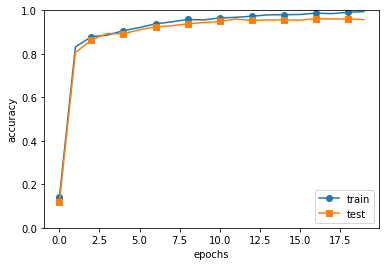

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
